In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import pacf
%matplotlib inline



Vamos a importar los datos y ver en qué forma los importó, es decir, que tipo de objeto creó!

In [30]:
#lectura de los datos
dfEur = pd.read_csv("temperature anomalies Europe.txt", sep=",", header=3) 
dfNA = pd.read_csv("temperature anomalies North Amer.txt", sep=",", header=3) 
dfSA = pd.read_csv("temperature anomalies South Amer.txt", sep=",", header=3) 


#check the dtypes

print(type(dfEur))
print(dfEur.dtypes)
print(dfEur)
print(dfEur.columns)
print(dfNA.columns)
print(dfSA.columns)

<class 'pandas.core.frame.DataFrame'>
Year      int64
Eur     float64
dtype: object
     Year   Eur
0    1910 -0.77
1    1911  0.54
2    1912 -1.25
3    1913  1.16
4    1914 -1.42
..    ...   ...
101  2011  0.62
102  2012  1.83
103  2013  1.62
104  2014  1.71
105  2015  2.25

[106 rows x 2 columns]
Index(['Year', 'Eur'], dtype='object')
Index(['Year', 'NAmer'], dtype='object')
Index(['Year', 'SAmer'], dtype='object')


Covertiremos la columna de fecha en un objeto de fechas usando to.datetime()

In [37]:
pd.to_datetime(dfEur['Year'],format='%Y')

0     1910-01-01
1     1911-01-01
2     1912-01-01
3     1913-01-01
4     1914-01-01
         ...    
101   2011-01-01
102   2012-01-01
103   2013-01-01
104   2014-01-01
105   2015-01-01
Name: Year, Length: 106, dtype: datetime64[ns]

Creación de un dataframe cuyo índice es la fecha 

In [51]:
d = {'Eur':dfEur['Eur'].values ,'NAmer':dfNA['NAmer'].values,'SAmer':dfSA['SAmer'].values}
dataframetemp=pd.DataFrame(data=d, index=pd.to_datetime(dfEur['Year'],format='%Y'))
dataframetemp

,Eur,NAmer,SAmer
Year,,,
1910-01-01,-0.77,0.19,-0.28
1911-01-01,0.54,-2.11,-0.09
1912-01-01,-1.25,0.52,-0.18
1913-01-01,1.16,1.26,-0.08
1914-01-01,-1.42,0.60,-0.61
...,...,...,...
2011-01-01,0.62,0.49,0.86
2012-01-01,1.83,0.41,1.25
2013-01-01,1.62,0.02,0.88


## Estadísticas Descriptivas

In [52]:
print(dataframetemp.describe())

              Eur       NAmer       SAmer
count  106.000000  106.000000  106.000000
mean     0.151226    0.140377    0.122358
std      1.017336    1.055006    0.456626
min     -2.400000   -2.560000   -0.710000
25%     -0.370000   -0.590000   -0.207500
50%      0.315000    0.130000    0.030000
75%      0.785000    0.885000    0.430000
max      2.250000    2.310000    1.380000


## Gráficos de las series de tiempo en una sola

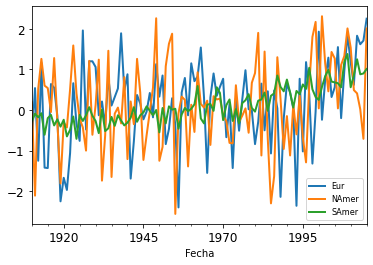

In [54]:
ax = dataframetemp.plot(linewidth=2, fontsize=12);

# Additional customizations
ax.set_xlabel('Fecha');
ax.legend(fontsize=8);

## Gráfico de una serie de tiempo en espacios individuales.

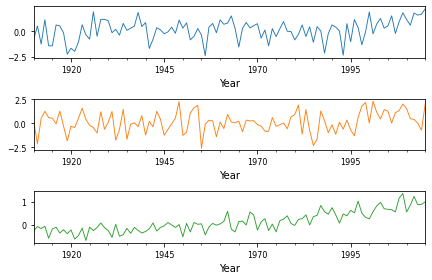

In [58]:
dataframetemp.plot(subplots=True,
          layout=(3, 1),
          sharex=False,
          sharey=False,
         fontsize=8,
         legend=False,
         linewidth=0.9);
plt.tight_layout();